## Binary Clasification model from scratch

This notebook will show my understanding of binary classification algorithm. Here we will implement binary classification model from scratch and test it with one, two and multiple features and visualize first two of them to predict the type of tumor - benign or malignant.

Firstly, let's import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

Then we implement our main class, this is pretty similiar to linear regression, but here we have another type of function - sigmoid, and another way to compute the loss on single pair of values - in the linear regresion we use mean square error here binary cross-entropy

In [2]:
class BinaryClassification:
    def __init__(self, alpha=0.01, iters=1000, lambda_=0):
        self.alpha = alpha
        self.iters = iters
        self.lambda_ = lambda_
        self.w = None
        self.b = None
        self.J_history = []
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def compute_cost(self, X, y):
        m, n = X.shape
        z = np.dot(X, self.w) + self.b
        f_wb = self.sigmoid(z)

        cost = -np.mean(y * np.log(f_wb + 1e-15) + (1 - y) * np.log(1 - f_wb + 1e-15))

        reg_cost = (self.lambda_ / (2 * m)) * np.sum(np.square(self.w))
        return cost + reg_cost
    
    def compute_gradient(self, X, y):
        m, n = X.shape
        z = np.dot(X, self.w) + self.b
        f_wb = self.sigmoid(z)
        
        err = f_wb - y
        dj_dw = (np.dot(X.T, err) + (self.lambda_ * self.w)) / m
        dj_db = np.sum(err) / m
        return dj_dw, dj_db
    
    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros((n,)) 
        self.b = 0.
        
        for i in range(self.iters):
            temp = self.compute_cost(X, y)
            dj_dw, dj_db = self.compute_gradient(X, y)
            
            self.w -= self.alpha * dj_dw
            self.b -= self.alpha * dj_db
            
            current_cost = self.compute_cost(X, y)
            if i % math.ceil(self.iters / 10) == 0:
                self.J_history.append(current_cost)
                print(f"Iteration {i:4}: Cost {current_cost:0.3e}")
            
            if temp-current_cost<1e-9:
                break

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        probabilities = self.sigmoid(z)
        return [1 if p >= 0.5 else 0 for p in probabilities]
    
    def accuracy(self, yhat, y):
        return np.mean(yhat == y) * 100

Our dataset called breast_cancer. We will read it, then split into train and test dataset

In [3]:
df = pd.read_csv('breast_cancer.csv')

In [4]:
df.head()

,id,diagnosis,"radius_mean,smoothness_me""",texture_mean,perimeter_mean,"area_meanan""",compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          569 non-null    int64  
 1   diagnosis                   569 non-null    object 
 2   radius_mean,smoothness_me"  569 non-null    float64
 3   texture_mean                569 non-null    float64
 4   perimeter_mean              569 non-null    float64
 5   area_meanan"                569 non-null    float64
 6   compactness_mean            569 non-null    float64
 7   concavity_mean              569 non-null    float64
 8   concave points_mean         569 non-null    float64
 9   symmetry_mean               569 non-null    float64
 10  fractal_dimension_mean      569 non-null    float64
 11  radius_se                   569 non-null    float64
 12  texture_se                  569 non-null    float64
 13  perimeter_se                569 non

In [7]:
features = df.keys()
features = list(features[2:-1])
features

['radius_mean,smoothness_me"',
 'texture_mean',
 'perimeter_mean',
 'area_meanan"',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

We have just one categorical feature let`s decode it use simple map function

In [8]:
df['diagnosis'] 

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [9]:
df['diagnosis'] = list(df['diagnosis'].map({'M': 1, 'B': 0}))


Separate features and target

In [10]:
X = df[features].values
y = df['diagnosis'].values


Get more familiar with them

In [11]:
print("Type of X:",type(X))
print("First five elements of X are:\n", X[:5])

Type of X: <class 'numpy.ndarray'>
First five elements of X are:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01]
 [1.142e+01 2.038e+01 7.758e+01

In [12]:
print("Type of X:",type(y))
print("First five elements of y are:\n", y[:5])

Type of X: <class 'numpy.ndarray'>
First five elements of y are:
 [1 1 1 1 1]


Now we need to understand fraction of 1s and 0s

In [13]:
print(np.sum(y))
print(len(y)-np.sum(y))

212
357


This whole project just for learning and I do not want to install another library to be able to import class MyNormalization (becouse it is from ipynb file) from the previous notebook, becous if someone wants to play with this code it could not be able to work properly, and i also don't want to create another file with extebsion .py, where I can put all my classes and needed functions becouse it would change my goal - explain step be stem my implementation and trying it on data. It won't be that clear and undestandable. So I just import normalisation from widely used library  - "sklearn"

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Splitting the data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Applying model on this data

In [17]:
model = BinaryClassification(iters=60000)
model.fit(X_train, y_train)

Iteration    0: Cost 6.727e-01
Iteration 6000: Cost 6.574e-02
Iteration 12000: Cost 5.850e-02
Iteration 18000: Cost 5.514e-02
Iteration 24000: Cost 5.305e-02
Iteration 30000: Cost 5.156e-02
Iteration 36000: Cost 5.043e-02
Iteration 42000: Cost 4.952e-02
Iteration 48000: Cost 4.876e-02
Iteration 54000: Cost 4.813e-02


Predicting our test data

In [18]:
yhat = model.predict(X_test)
print(yhat[:5])

[0, 1, 0, 1, 1]


Compution accuracy

In [19]:
accuracy = model.accuracy(yhat, y_test)
print(accuracy)

97.36842105263158


In [20]:
yhat = model.predict(X_train)
accuracy = model.accuracy(yhat, y_train)
print(accuracy)

99.34065934065934


It is pretty high, we did a great job! ;)

Now for the next two models I will print out the correlation matrix to understand how they correlate with diagnisis(I know that this is not really good idea as it could "catch" just linear relationship, but I need it just for learning purposes, in reality if you have 30 feature you would not need to chose one or two to build model)

In [21]:
corr_matrix = df.corr()
target_corr = corr_matrix['diagnosis'].sort_values(ascending=False)
print(target_corr)

diagnosis                     1.000000
symmetry_worst                0.793566
area_worst                    0.782914
symmetry_mean                 0.776614
texture_worst                 0.776454
perimeter_mean                0.742636
smoothness_worst              0.733825
radius_mean,smoothness_me"    0.730029
area_meanan"                  0.708984
concave points_mean           0.696360
concave points_worst          0.659610
concavity_mean                0.596534
concavity_worst               0.590998
texture_se                    0.567134
area_se                       0.556141
smoothness_se                 0.548236
perimeter_worst               0.456903
compactness_worst             0.421465
fractal_dimension_worst       0.416294
texture_mean                  0.415185
symmetry_se                   0.408042
compactness_mean              0.358560
fractal_dimension_mean        0.330499
Unnamed: 31                   0.323872
concavity_se                  0.292999
concave points_se        

### Binary classification with one feature

Now I want to see how this model divedes data into two groups, i want to see the threashhold

Let`s start with one feature, that one that had the biggest w, so it means it had the gratest inpact on the prediction

Spliting feature and target

In [22]:
X_1 = df[["symmetry_worst"]].values

Let`s plot feature vs target

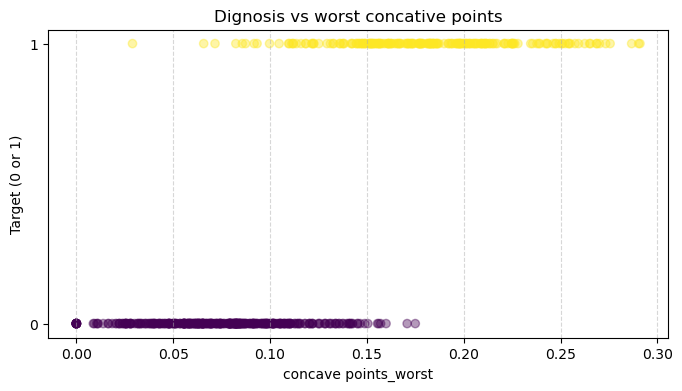

In [23]:
plt.figure(figsize=(8, 4))
plt.scatter(X_1, y, c=y, cmap='viridis', alpha=0.4)
plt.xlabel('concave points_worst')
plt.ylabel('Target (0 or 1)')
plt.title('Dignosis vs worst concative points')
plt.yticks([0, 1])
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

Splitting into test and train sets

In [24]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y, test_size=0.3, random_state=1)

In [25]:
scaler_1 = StandardScaler()
X_train_1 = scaler_1.fit_transform(X_train_1)
X_test_1  = scaler_1.transform(X_test_1)

In [26]:
X_train_1.shape

(398, 1)

In [27]:
X_test_1.shape

(171, 1)

In [28]:
model_1 = BinaryClassification(iters = 90000)
model_1.fit(X_train_1, y_train_1)
model_1.J_history

Iteration    0: Cost 6.915e-01
Iteration 9000: Cost 1.906e-01
Iteration 18000: Cost 1.874e-01
Iteration 27000: Cost 1.870e-01
Iteration 36000: Cost 1.869e-01


[0.6914575658693702,
 0.19064277483168315,
 0.18737276782104673,
 0.18695802626545935,
 0.1868876819956954]

In [29]:
yhat_1 = model_1.predict(X_test_1)
model_1.accuracy(yhat_1, y_test_1)

88.30409356725146

Depending on the fact that we predicted target using just one feature of 30. It`s really good result

In [30]:
X_norm_1 = scaler_1.transform(X_1)

In [31]:
yhat_gen = model_1.predict(X_norm_1)

And finally we can see the boundary (we use np.linspace(X_1.min(), X_1.max(), 300) instread of X_1 becouse it is not sorted and it won`t look correct)

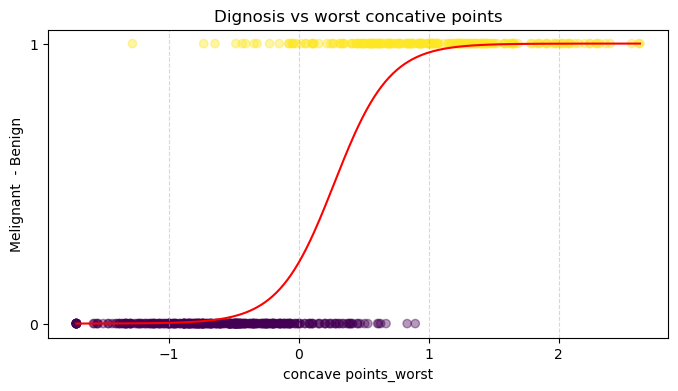

In [32]:
X_smooth = np.linspace(X_norm_1.min(), X_norm_1.max(), 300)
plt.figure(figsize=(8, 4))
plt.scatter(X_norm_1, y, c=y, cmap='viridis', alpha=0.4)
plt.plot(X_smooth, 1/(1+ np.exp(-(X_smooth*model_1.w + model_1.b))), color = 'red')
plt.xlabel('concave points_worst')
plt.ylabel('Melignant  - Benign')
plt.title('Dignosis vs worst concative points')
plt.yticks([0, 1])
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

### Binary Classification with two variables

Now we will try two variables

In [33]:
X_2 = df[["symmetry_worst", "area_worst"]].values
X_2[:5]


array([[2.654e-01, 1.846e+02],
       [1.860e-01, 1.588e+02],
       [2.430e-01, 1.525e+02],
       [2.575e-01, 9.887e+01],
       [1.625e-01, 1.522e+02]])

Let`s plot them to see how our classes is situated compare to each other

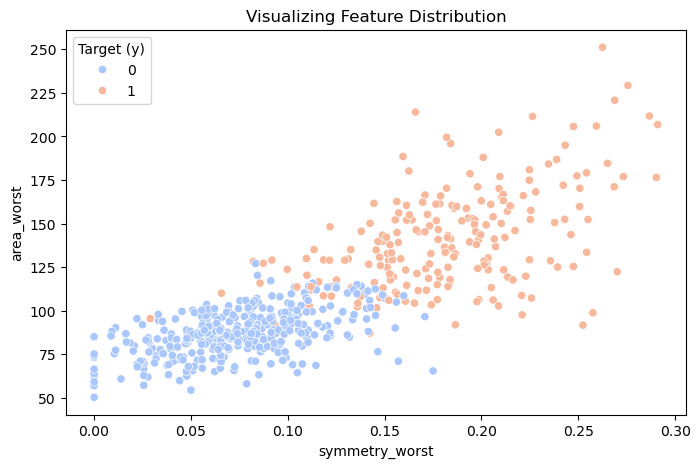

In [34]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_2[:, 0], y=X_2[:, 1], hue=y, palette='coolwarm')
plt.title("Visualizing Feature Distribution")
plt.xlabel("symmetry_worst")
plt.ylabel("area_worst")
plt.legend(title="Target (y)")

plt.show()

Here everything the same as before - splitting into train and test, scaling, appleing model, training it, prediction test and looking at the accuracy

In [35]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=1)


In [36]:
scaler_2 = StandardScaler()
X_train_2 = scaler_2.fit_transform(X_train_2)
X_test_2 = scaler_2.transform(X_test_2)

In [37]:
model_2 = BinaryClassification(iters=100000, alpha = 0.1)
model_2.fit(X_train_2, y_train_2)

Iteration    0: Cost 6.621e-01
Iteration 10000: Cost 1.111e-01


In [38]:
yhat = model_2.predict(X_test_2)

In [39]:
yhat[:5]



[0, 1, 0, 1, 0]

In [40]:
r_2 = model_2.accuracy(yhat, y_test_2)
r_2

94.73684210526315

In [41]:
X_normalized_2 = scaler_2.transform(X_2)

Here we finaly can see desicion boundary which was build by our model

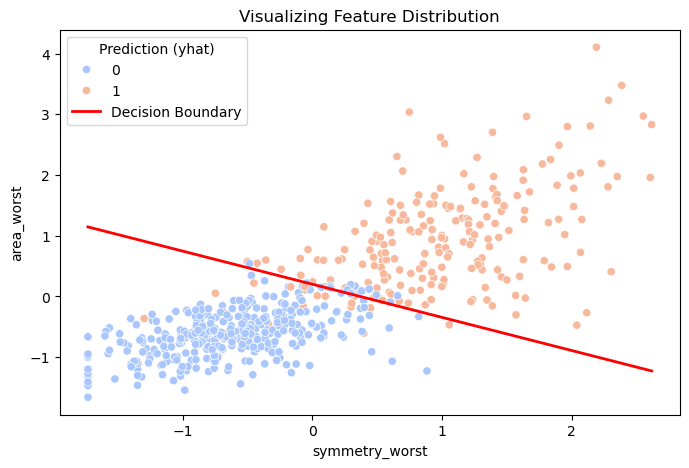

In [43]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_normalized_2[:, 0], y=X_normalized_2[:, 1], hue=y, palette='coolwarm')
x1_values = np.linspace(X_normalized_2[:, 0].min(), X_normalized_2[:, 0].max(), 100)
x2_values = -(model_2.w[0] * x1_values + model_2.b) / model_2.w[1]
plt.plot(x1_values, x2_values, color='red', linewidth=2, label='Decision Boundary')

plt.title("Visualizing Feature Distribution")
plt.xlabel("symmetry_worst")
plt.ylabel("area_worst")
plt.legend(title="Prediction (yhat)")

plt.show()